<a href="https://colab.research.google.com/github/davidromeropro/sales-predictions/blob/main/Predicciones_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO: Predicciones de ventas**
## Creado por: David Romero

* Fecha creado: 17/02/2023
* Fecha de actualización: 03/03/2023
* Descripción: Predicciones de ventas alimenticias.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# filename = '/content/drive/MyDrive/CodingDojo/Week1/Assignments/sales_predictions.csv'
filename = '/home/dev/Developer/gdrive/CodingDojo/Week1/Assignments/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) ¿Cuántas filas y columnas?

In [ ]:
df.shape

(8523, 12)

2) ¿Cuáles son los tipos de datos en cada variable?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [ ]:
df.duplicated().sum()

0

4) Identifiquen los valores faltantes.

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [ ]:
print('Valores faltantes en Item_Weight:\n', df['Item_Weight'].isna().sum())
print('Muestra de valores en Item_Weight:\n', df['Item_Weight'].value_counts().head(5))

print('Valores faltantes en Outlet_Size:\n', df['Outlet_Size'].isna().sum())
print('Muestra de valores en Outlet_Size:\n', df['Outlet_Size'].value_counts().head(5))

Valores faltantes en Item_Weight:
 1463
Muestra de valores en Item_Weight:
 12.15    86
17.60    82
13.65    77
11.80    76
15.10    68
Name: Item_Weight, dtype: int64
Valores faltantes en Outlet_Size:
 2410
Muestra de valores en Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


* No se va a eliminar los registros con valores faltantes.
* Se va a definir un valor por defecto para los valores faltantes:
	* Para Item_Weight se va a definir con -1
	* Para Outlet_Size se va a definir con undefined

In [ ]:
df['Item_Weight'].fillna(-1, inplace=True)
df['Outlet_Size'].fillna('undefined', inplace=True)

6) Confirmen que no hay valores faltantes después de abordarlos.

In [ ]:
variables = ['Item_Weight','Outlet_Size']
df[variables].isna().sum()

Item_Weight    0
Outlet_Size    0
dtype: int64

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [ ]:
# Muestra de valores de columnas categoricas.
for column in df.select_dtypes(['object']).columns:
	print(column)
	print(df[column].value_counts().head(10))
	print('*'* 100)

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
Name: Item_Identifier, dtype: int64
****************************************************************************************************
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
****************************************************************************************************
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Name: Item_Type, dtype: int64
****************************************************************************************************
Outlet_Identifier
OUT027    935
OUT013    932
OUT04

In [ ]:
# Se estandariza valores para Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [ ]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523,8523,8523.000000
unique,1559,NaN,2,NaN,16,NaN,10,NaN,4,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5517,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,10.478936,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,6.720742,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,-1.000000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,6.650000,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,11.000000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.000000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


### Histograma para ver las distribuciones de diversas características en el conjunto de datos.

In [ ]:
# Columnas con datos númericos 
df.describe().columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

#### Item MRP 

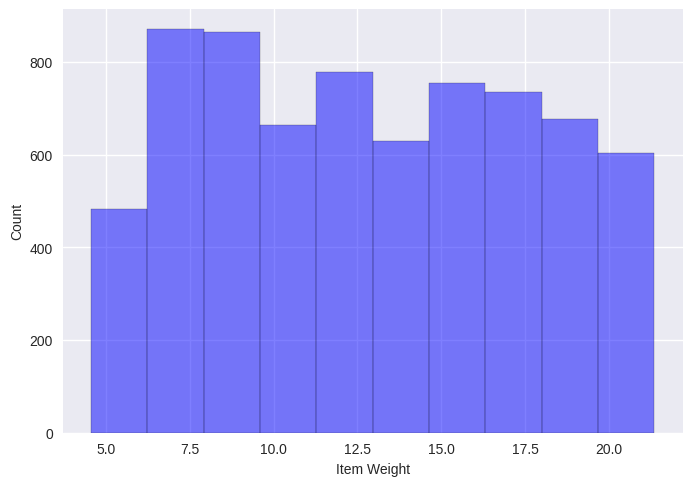

In [ ]:
# Se filtra los registros que si tienen valores en Item Weight
item_weight = df.loc[df['Item_Weight'] > 0,'Item_Weight']

plt.style.use("seaborn-v0_8");
plt.hist(item_weight, alpha=.5,color='blue',edgecolor='black',bins=10);
plt.ylabel('Count');
plt.xlabel('Item Weight');

* El peso de los items tiene una distribución casi uniforme para los items que si tienen valores en esta característica. 

#### Item Visibility

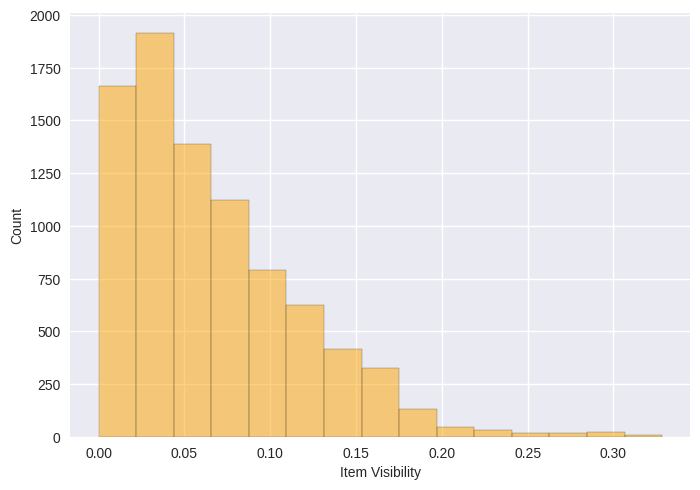

In [ ]:
plt.hist(df['Item_Visibility'], alpha=0.5,color='orange',edgecolor='black',bins=15);
plt.ylabel('Count');
plt.xlabel('Item Visibility');

* La visibilidad de los items tiene una distribución sesgada a la derecha, es decir entre menor es la visibilidad de un item mayor es su número.  

### Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

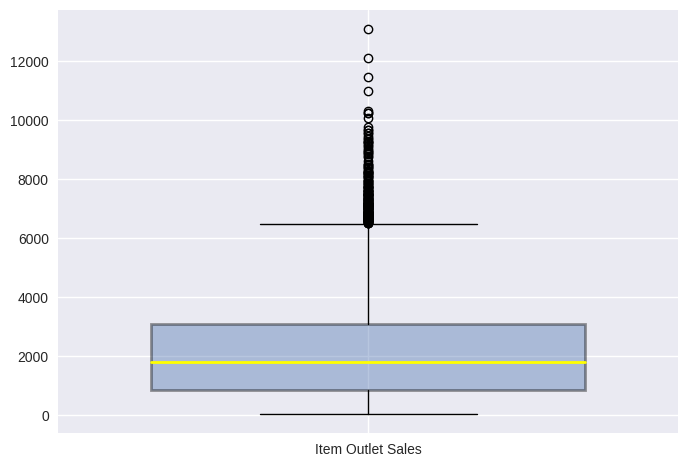

In [ ]:
item_outlet_sale = df['Item_Outlet_Sales']
boxplots = plt.boxplot([item_outlet_sale],labels=['Item Outlet Sales'],
            widths = .7,
            patch_artist=True,
            medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
            boxprops = dict( linewidth=2, color='Black', alpha = .4));

In [ ]:
df['Item_Outlet_Sales'].describe().round(2)

count     8523.00
mean      2181.29
std       1706.50
min         33.29
25%        834.25
50%       1794.33
75%       3101.30
max      13086.96
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
df['Item_Outlet_Sales'].median()

1794.331

* Si bien la escala para las ventas de items dificulta determinar el valor mínimo de 33.29, el valor de la mediana (color amarillo) de 1794.331, se puede observar que existen varios valores atípicos que estan fuera del patrón de distribución y que corresponden a valores altos de ventas. 

### Mapa de calor de la correlación entre las características.

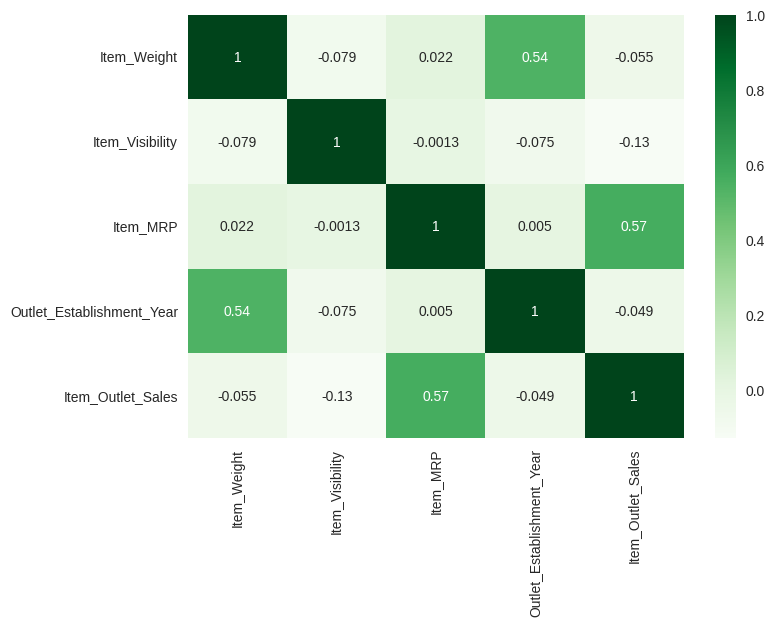

In [ ]:
corr = df[df.describe().columns].corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

Hay una correlación moderada entre el precio de venta de un item con las ventas del mismo.